# Predicting survival from titanic crash using Naive Bayes

In [33]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [4]:
df = pd.read_csv("D:/122B1F034/Dataset/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [6]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [7]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [8]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


**One column is enough to repressent male vs female**

In [9]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [10]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [11]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [12]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True
3,1,35.0,53.1000,True
4,3,35.0,8.0500,False


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [15]:
model.fit(X_train,y_train)

GaussianNB()

In [17]:
model.score(X_test,y_test)

0.7723880597014925

In [18]:
X_test[0:10]

,Pclass,Age,Fare,female
749,3,31.000000,7.7500,False
196,3,29.699118,7.7500,False
641,1,24.000000,69.3000,True
109,3,29.699118,24.1500,True
452,1,30.000000,27.7500,False
230,1,35.000000,83.4750,True
348,3,3.000000,15.9000,False
468,3,29.699118,7.7250,False
31,1,29.699118,146.5208,True
865,2,42.000000,13.0000,True


In [19]:
y_test[0:10]

749    0
196    0
641    1
109    1
452    0
230    1
348    1
468    0
31     1
865    1
Name: Survived, dtype: int64

In [31]:
y_pred = model.predict(X_test)

In [24]:
model.predict_proba(X_test[:10])

array([[9.68227583e-01, 3.17724169e-02],
       [9.67847422e-01, 3.21525779e-02],
       [3.59255320e-02, 9.64074468e-01],
       [4.66576911e-01, 5.33423089e-01],
       [8.06588252e-01, 1.93411748e-01],
       [2.02253828e-02, 9.79774617e-01],
       [9.47440485e-01, 5.25595151e-02],
       [9.67841446e-01, 3.21585542e-02],
       [1.14782256e-04, 9.99885218e-01],
       [3.15617377e-01, 6.84382623e-01]])

**Calculate the score using cross validation**

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.792     , 0.728     , 0.848     , 0.70967742, 0.74193548])

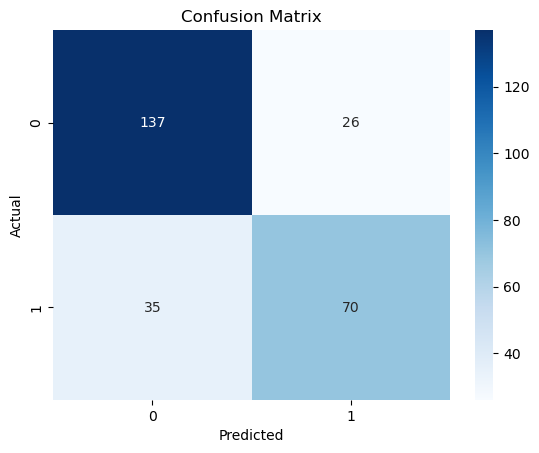

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # use 'binary' for binary classification

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7724
Precision: 0.7701
Recall: 0.7724


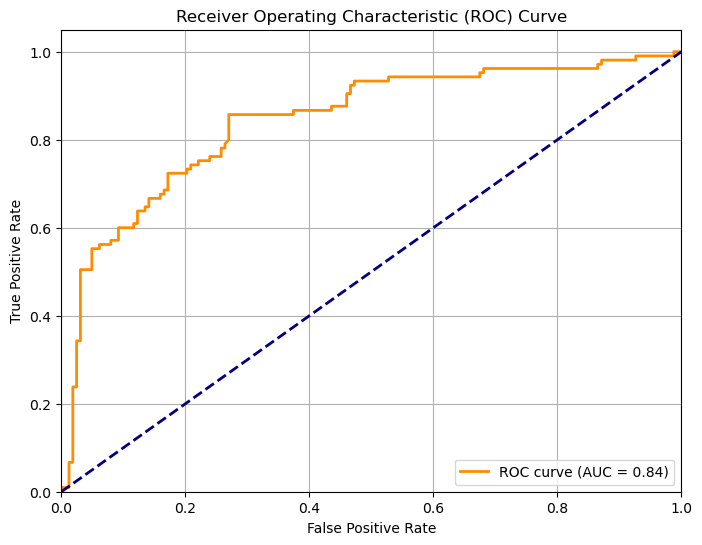

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (for the positive class)
y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()